In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv('diabetes_health_indicators.csv')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239120 entries, 0 to 239119
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes              239120 non-null  float64
 1   HighBP                239120 non-null  float64
 2   HighChol              239120 non-null  float64
 3   CholCheck             239120 non-null  float64
 4   BMI                   239120 non-null  float64
 5   Smoker                239120 non-null  float64
 6   Stroke                239120 non-null  float64
 7   HeartDiseaseorAttack  239120 non-null  float64
 8   PhysActivity          239120 non-null  float64
 9   Fruits                239120 non-null  float64
 10  Veggies               239120 non-null  float64
 11  HvyAlcoholConsump     239120 non-null  float64
 12  AnyHealthcare         239120 non-null  float64
 13  NoDocbcCost           239120 non-null  float64
 14  GenHlth               239120 non-null  float64
 15  

In [54]:
X = df.drop('Diabetes',axis=1)

In [55]:
y = df['Diabetes']

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
model = DecisionTreeClassifier()

In [60]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [61]:
preds = model.predict(X_test) 

In [62]:
preds

array([0., 2., 1., ..., 0., 0., 0.])

In [63]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [64]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87     60527
         1.0       0.02      0.03      0.02      1304
         2.0       0.29      0.31      0.30      9905

    accuracy                           0.77     71736
   macro avg       0.39      0.40      0.40     71736
weighted avg       0.78      0.77      0.77     71736



In [65]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler()

In [68]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knn_model = KNeighborsClassifier(n_neighbors = 4)
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [71]:
y_pred = knn_model.predict(scaled_X_test)

In [72]:
from sklearn.metrics import classification_report,confusion_matrix

In [73]:
confusion_matrix(y_test,y_pred)

array([[58542,    56,  1983],
       [ 1176,     2,   122],
       [ 8421,    19,  1415]], dtype=int64)

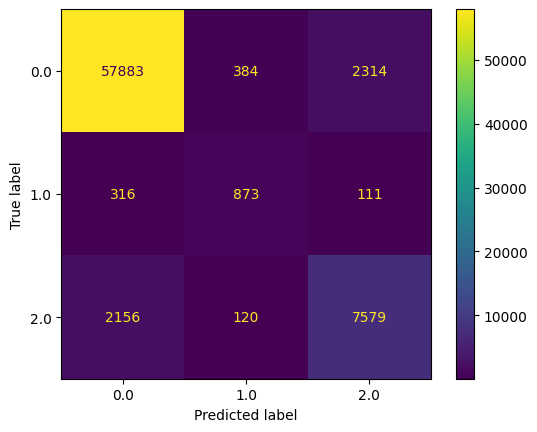

In [74]:
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)